# Movie Dataset Descriptive Analysis

This notebook explores the movie dataset to understand patterns in popularity and other features.

## 1. Setup and Data Loading

In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)
from skimpy import skim

In [19]:
df = pd.read_csv("../../data/movie_feb2025.csv", engine="python")
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

## 1.1 Data Cleaning

In [20]:
# Check data quality issues first
print("Data quality check:")
print(f"Total movies: {len(df)}")
print(f"Movies with vote_count = 0: {(df['vote_count'] == 0).sum()}")
print(f"Movies with vote_count = 0 AND vote_average != 0: {((df['vote_count'] == 0) & (df['vote_average'] != 0)).sum()}")

# Check what vote_average values exist when vote_count is 0
zero_vote_ratings = df[df['vote_count'] == 0]['vote_average'].value_counts()
print(f"\nVote averages when vote_count=0:")
print(zero_vote_ratings.head())

# Fix data quality: set vote_average to NaN when vote_count is 0
print(f"\nCleaning data: Setting vote_average to NaN when vote_count=0...")
df.loc[df['vote_count'] == 0, 'vote_average'] = pd.NA

print(f"After cleaning:")
print(f"Movies with missing vote_average: {df['vote_average'].isna().sum()}")
print(f"Movies with vote_count = 0 AND non-missing vote_average: {((df['vote_count'] == 0) & (df['vote_average'].notna())).sum()}")

Data quality check:
Total movies: 1032235
Movies with vote_count = 0: 647367
Movies with vote_count = 0 AND vote_average != 0: 903

Vote averages when vote_count=0:
vote_average
0.0     646464
6.0        173
10.0       102
7.0        101
1.0         99
Name: count, dtype: int64

Cleaning data: Setting vote_average to NaN when vote_count=0...
After cleaning:
Movies with missing vote_average: 655833
Movies with vote_count = 0 AND non-missing vote_average: 0


In [21]:
# Create a clean subset for analysis (movies with actual ratings)
df_rated = df[df['vote_average'].notna()].copy()
print(f"\nMovies with actual ratings (for correlation analysis): {len(df_rated)}")
print(f"Percentage of total dataset: {len(df_rated)/len(df)*100:.1f}%")


Movies with actual ratings (for correlation analysis): 376402
Percentage of total dataset: 36.5%


## 2. Basic Data Exploration

In [24]:
df.sample(n=5)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,novelty,popularity_group
1010815,False,/uCWlZteHNaghl9JQIa6oJC4igwp.jpg,NaN,25000,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,1404133.0,tt33373007,['AU'],en,UNBOXING,"Tom, a wannabe streamer becomes the prime susp...",0.139,/fY6UOCvi96wahADuk6RxK6ggIKV.jpg,[],"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",NaN,0.0,75.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,What's in the box?,UNBOXING,False,10.0,1.0,NaN,Medium
1022674,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1419268.0,NaN,['GB'],en,Don't Call It Ghost Town,Two unique perspectives on the city of Liverpo...,0.007,NaN,"[{'id': 202900, 'logo_path': '/yP3wW8lCPspDZE4...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaN,0.0,18.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Planned,NaN,Don't Call It Ghost Town,False,NaN,0.0,NaN,Low
1024879,False,NaN,NaN,0,"[{'id': 10749, 'name': 'Romance'}]",NaN,1422371.0,tt0341373,['TR'],tr,Gelin Ayşem,NaN,0.022,NaN,"[{'id': 251158, 'logo_path': None, 'name': 'Ba...",[],1957-01-01,0.0,0.0,[],Released,NaN,Gelin Ayşem,False,NaN,0.0,NaN,Medium
330072,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,478110.0,tt6391732,['US'],en,The Pathological Optimist,THE PATHOLOGICAL OPTIMIST takes us into the in...,0.952,/7IkCFolSHufL7PoDdrixelATnRE.jpg,"[{'id': 3916, 'logo_path': '/noNtRpiSEx5XUfhWb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-09-29,11222.0,93.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Liar. Healer. Monster. Savior.,The Pathological Optimist,False,8.3,3.0,NaN,High
709724,False,NaN,NaN,0,[],NaN,995076.0,tt0071387,['US'],en,Damage,"In this film, [Dixon] explores time, duration,...",0.001,NaN,[],[],1972-03-30,0.0,12.0,[],Released,NaN,Damage,False,NaN,0.0,NaN,Low


In [4]:
df.isna().mean().sort_values(ascending=True)

adult                    0.000000
budget                   0.005770
id                       0.005770
genres                   0.005770
original_language        0.005770
origin_country           0.005770
original_title           0.006841
production_companies     0.006986
production_countries     0.008202
popularity               0.008202
vote_average             0.008202
video                    0.008202
status                   0.008202
spoken_languages         0.008202
runtime                  0.008202
revenue                  0.008202
vote_count               0.008202
title                    0.008210
release_date             0.108908
overview                 0.173339
poster_path              0.255339
imdb_id                  0.418957
backdrop_path            0.683931
tagline                  0.851992
homepage                 0.876953
belongs_to_collection    0.971606
novelty                  1.000000
dtype: float64

In [5]:
skim(df[['vote_average', 'vote_count', 'popularity']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1032235 │ │ float64     │ 3     │                                                         │
│ │ Number of columns │ 3       │ └─────────────┴───────┘                                                         │
│ └───────────────────┴─────────┘                                                                                 │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %                ┃ mean   ┃ sd    ┃ p0 ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ vote_average  │  8466 │  0.8201620754963743 │  2.175 │ 3.103 │  0 │     0 │     0 │ 5.038 │    10 │ █ ▁▂▁  │  │
│ │ vote_count    │  8466 │  0.8201620754963743 │  23.61 │ 364.8 │  0 │     0 │     0 │     1 │ 36750 │   █    │  │
│ │ popularity    │  8466 │  0.8201620754963743 │  1.152 │ 12.41 │  0 │ 0.017 │ 0.258 │ 0.858 │  5439 │   █    │  │
│ └───────────────┴───────┴─────────────────────┴────────┴───────┴────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
len(df[df['vote_count'] == 0])/len(df)

0.6271507941505569

In [7]:
df[df['vote_count'] == 0]['vote_average']

978        0.0
1460       0.0
1465       0.0
1504       0.0
1507       0.0
          ... 
1032230    0.0
1032231    0.0
1032232    0.0
1032233    0.0
1032234    0.0
Name: vote_average, Length: 647367, dtype: float64

In [8]:
df['original_language'].value_counts()

original_language
en                 512839
fr                  64698
es                  59865
de                  47926
ja                  44428
                    ...  
kj                      1
nr                      1
ii                      1
In Production           1
Post Production         1
Name: count, Length: 179, dtype: int64

In [9]:
df['origin_country'].value_counts()

origin_country
['US']                414581
['FR']                 56550
['JP']                 44657
['DE']                 42226
['ES']                 34224
                       ...  
['FR', 'SN', 'CH']         1
['BG', 'NL', 'US']         1
['IE', 'RE']               1
['IT', 'PT', 'TR']         1
['BD', 'MM']               1
Name: count, Length: 5639, dtype: int64

## 3. Popularity Analysis - High vs Low Popularity Films

In [22]:
# Define popularity groups based on percentiles
print("Popularity distribution:")
print(f"Mean: {df['popularity'].mean():.2f}")
print(f"Median: {df['popularity'].median():.2f}")
print(f"25th percentile: {df['popularity'].quantile(0.25):.2f}")
print(f"75th percentile: {df['popularity'].quantile(0.75):.2f}")
print(f"90th percentile: {df['popularity'].quantile(0.9):.2f}")

# Create high/low popularity groups (top 25% vs bottom 25%)
high_pop_threshold = df['popularity'].quantile(0.75)
low_pop_threshold = df['popularity'].quantile(0.25)

df['popularity_group'] = 'Medium'
df.loc[df['popularity'] >= high_pop_threshold, 'popularity_group'] = 'High'
df.loc[df['popularity'] <= low_pop_threshold, 'popularity_group'] = 'Low'

print(f"\nPopularity groups:")
print(df['popularity_group'].value_counts())

Popularity distribution:
Mean: 1.15
Median: 0.26
25th percentile: 0.02
75th percentile: 0.86
90th percentile: 2.19

Popularity groups:
popularity_group
Medium    516907
Low       259375
High      255953
Name: count, dtype: int64
popularity_group
Medium    516907
Low       259375
High      255953
Name: count, dtype: int64


### 3.1 Comparing Basic Statistics by Popularity Groups

In [11]:
# Compare numeric features by popularity groups
numeric_cols = ['vote_average', 'vote_count', 'popularity']
comparison = df.groupby('popularity_group')[numeric_cols].agg(['mean', 'median', 'std']).round(2)
print("Statistics by Popularity Group:")
print(comparison)

# Focus on high vs low (exclude medium for clarity)
high_low = df[df['popularity_group'].isin(['High', 'Low'])]
print(f"\n\nHigh vs Low Popularity Comparison:")
for col in ['vote_average', 'vote_count']:
    high_mean = df[df['popularity_group'] == 'High'][col].mean()
    low_mean = df[df['popularity_group'] == 'Low'][col].mean()
    print(f"{col}: High={high_mean:.2f}, Low={low_mean:.2f}, Difference={high_mean-low_mean:.2f}")

# Check what percentage have zero votes in each group
print(f"\nZero votes percentage:")
for group in ['High', 'Low']:
    zero_votes_pct = (df[df['popularity_group'] == group]['vote_count'] == 0).mean() * 100
    print(f"{group} popularity: {zero_votes_pct:.1f}% have zero votes")

Statistics by Popularity Group:
                 vote_average              vote_count                 \
                         mean median   std       mean median     std   
popularity_group                                                       
High                     4.35   5.33  2.91      92.73    4.0  725.15   
Low                      0.03   0.00  0.49       0.01    0.0    0.23   
Medium                   2.17   0.00  3.20       0.86    0.0    8.86   

                 popularity                
                       mean median    std  
popularity_group                           
High                   4.01   1.78  24.60  
Low                    0.00   0.00   0.00  
Medium                 0.30   0.26   0.23  


High vs Low Popularity Comparison:
vote_average: High=4.35, Low=0.03, Difference=4.32
vote_average: High=4.35, Low=0.03, Difference=4.32
vote_count: High=92.73, Low=0.01, Difference=92.72

Zero votes percentage:
High popularity: 25.7% have zero votes
vote_count: High=9

### 3.2 Categorical Features Analysis

In [15]:
# Language distribution by popularity
print("Original Language - Top 10 by Popularity Group:")
lang_pop = pd.crosstab(df['original_language'], df['popularity_group'], normalize='columns') * 100
print(lang_pop.round(1).sort_values('High', ascending=False).head(10))

print(f"\n\nCountry distribution - Top 10 by Popularity Group:")
country_pop = pd.crosstab(df['origin_country'], df['popularity_group'], normalize='columns') * 100
print(country_pop.round(1).sort_values('High', ascending=False).head(10))

# What languages/countries are over-represented in high popularity films?
print(f"\n\nLanguages over-represented in High popularity (>10% difference):")
lang_diff = lang_pop['High'] - lang_pop['Low']
overrep_lang = lang_diff[lang_diff > 10].sort_values(ascending=False)
print(overrep_lang)

print(f"\nCountries over-represented in High popularity (>5% difference):")
country_diff = country_pop['High'] - country_pop['Low']
overrep_country = country_diff[country_diff > 5].sort_values(ascending=False)
print(overrep_country)

Original Language - Top 10 by Popularity Group:
popularity_group   High   Low  Medium
original_language                    
en                 47.0  56.4    48.2
ja                  9.5   2.8     2.5
fr                  5.5   5.9     6.9
es                  4.6   5.0     6.9
de                  3.6   3.8     5.6
ru                  3.6   2.2     1.8
zh                  3.2   3.2     2.2
it                  2.9   1.8     2.2
ko                  2.5   0.9     0.9
pt                  1.5   4.2     3.6


Country distribution - Top 10 by Popularity Group:
popularity_group  High   Low  Medium
origin_country                      
['US']            36.0  49.0    38.2
['JP']             9.4   2.9     2.5
['FR']             4.7   5.4     6.0
['IN']             4.1   1.2     2.7
['DE']             3.0   3.5     5.0
['IT']             2.8   1.9     2.2
['GB']             2.7   1.9     2.8
['KR']             2.4   1.0     0.9
['ES']             2.3   3.5     3.8
['SU']             2.2   0.9     0.7

### 3.3 Visualizations

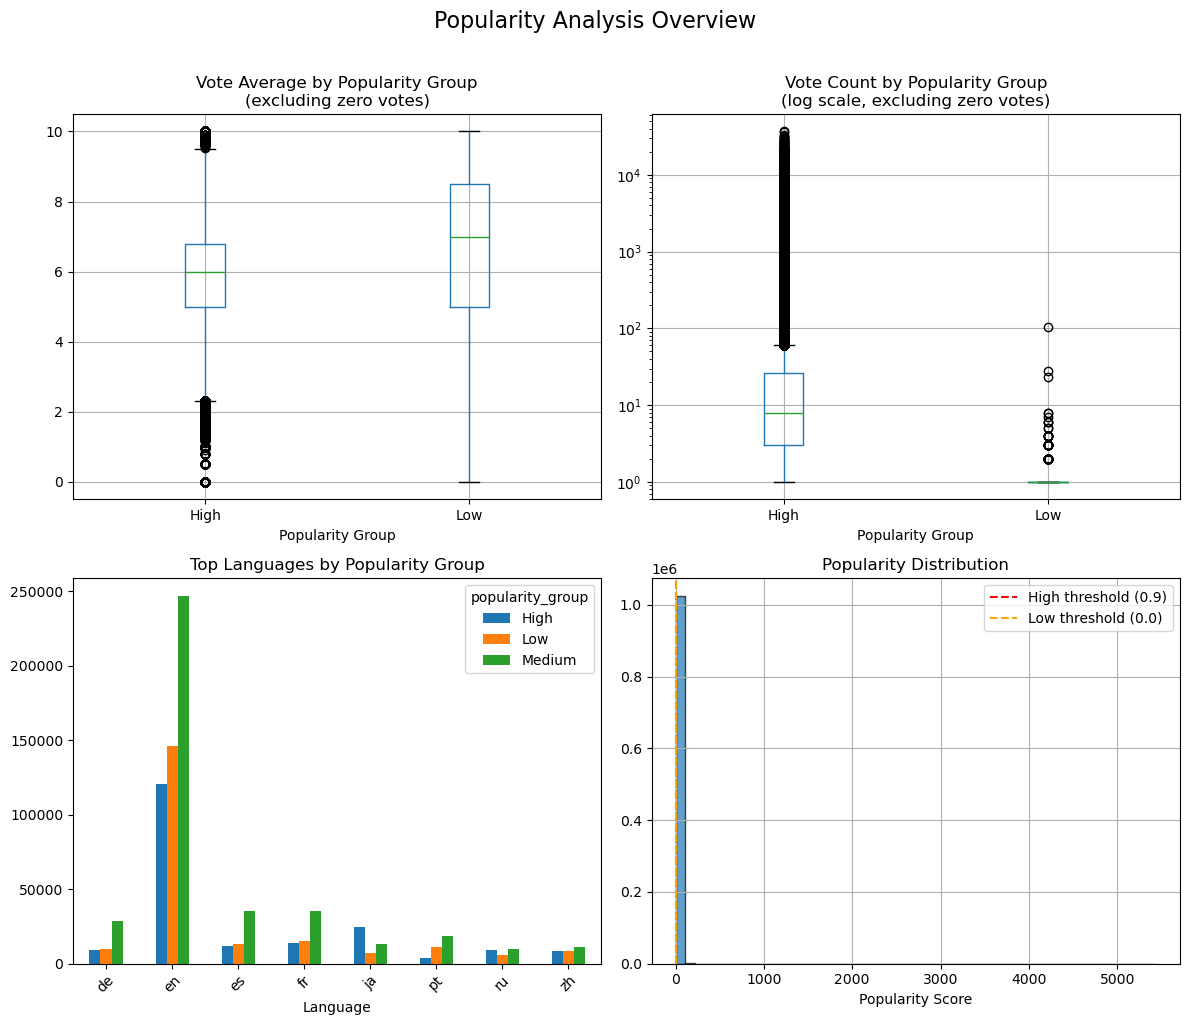

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Create subplots for key comparisons
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Vote average by popularity group
high_low[high_low['vote_count'] > 0].boxplot(column='vote_average', by='popularity_group', ax=axes[0,0])
axes[0,0].set_title('Vote Average by Popularity Group\n(excluding zero votes)')
axes[0,0].set_xlabel('Popularity Group')

# 2. Vote count by popularity group (log scale due to large range)
high_low[high_low['vote_count'] > 0].boxplot(column='vote_count', by='popularity_group', ax=axes[0,1])
axes[0,1].set_yscale('log')
axes[0,1].set_title('Vote Count by Popularity Group\n(log scale, excluding zero votes)')
axes[0,1].set_xlabel('Popularity Group')

# 3. Language distribution for top languages
top_langs = df['original_language'].value_counts().head(8).index
lang_subset = df[df['original_language'].isin(top_langs)]
lang_counts = pd.crosstab(lang_subset['original_language'], lang_subset['popularity_group'])
lang_counts.plot(kind='bar', ax=axes[1,0], rot=45)
axes[1,0].set_title('Top Languages by Popularity Group')
axes[1,0].set_xlabel('Language')

# 4. Popularity distribution
df['popularity'].hist(bins=50, ax=axes[1,1], alpha=0.7, edgecolor='black')
axes[1,1].axvline(high_pop_threshold, color='red', linestyle='--', label=f'High threshold ({high_pop_threshold:.1f})')
axes[1,1].axvline(low_pop_threshold, color='orange', linestyle='--', label=f'Low threshold ({low_pop_threshold:.1f})')
axes[1,1].set_title('Popularity Distribution')
axes[1,1].set_xlabel('Popularity Score')
axes[1,1].legend()

plt.tight_layout()
plt.suptitle('Popularity Analysis Overview', y=1.02, fontsize=16)
plt.show()

### 3.4 Feature Correlation Analysis

Correlation with Popularity (movies with actual ratings only):
vote_count      0.215756
vote_average    0.021759
Name: popularity, dtype: float64


All Feature Correlations with Popularity (rated movies only):
vote_count      0.215756
is_english      0.027190
is_us           0.026152
vote_average    0.021759
Name: popularity, dtype: float64
vote_count      0.215756
is_english      0.027190
is_us           0.026152
vote_average    0.021759
Name: popularity, dtype: float64


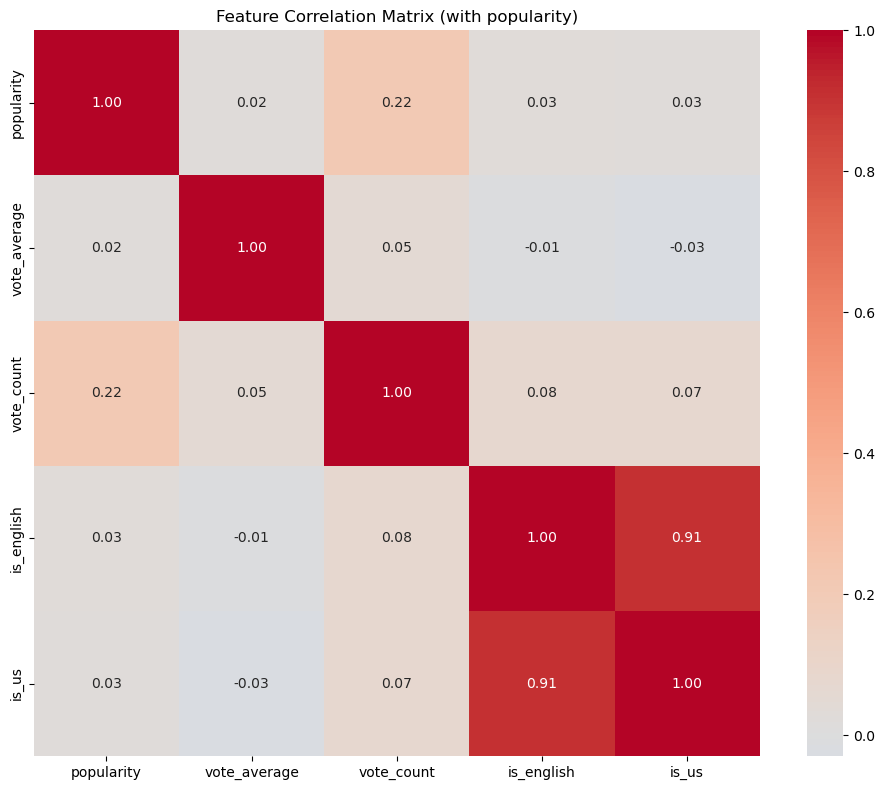

In [23]:
# Correlation analysis - what features correlate with popularity (using movies with ratings only)
print("Correlation with Popularity (movies with actual ratings only):")
correlations = df_rated[['vote_average', 'vote_count', 'popularity']].corr()['popularity'].drop('popularity').sort_values(ascending=False)
print(correlations)

# Create dummy variables for key categorical features to see their impact
df_encoded = df_rated.copy()
df_encoded['is_english'] = (df_encoded['original_language'] == 'en').astype(int)
df_encoded['is_us'] = (df_encoded['origin_country'].str.contains('US', na=False)).astype(int)

# Correlation with encoded features
print(f"\n\nAll Feature Correlations with Popularity (rated movies only):")
features_corr = df_encoded[['vote_average', 'vote_count', 'is_english', 'is_us', 'popularity']].corr()['popularity'].drop('popularity').sort_values(ascending=False)
print(features_corr)

# Simple correlation heatmap (including popularity)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded[['popularity', 'vote_average', 'vote_count', 'is_english', 'is_us']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix (with popularity)')
plt.tight_layout()
plt.show()

In [ ]:
# Check features we actually have available
print("Available columns in the dataset:")
print(df.columns.tolist())
print(f"\nTotal columns: {len(df.columns)}")

# Check data types
print(f"\nColumn data types:")
print(df.dtypes)

Available columns in the dataset:
['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'origin_country', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'novelty', 'popularity_group']

Total columns: 28

Column data types:
adult                     object
backdrop_path             object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
origin_country            object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      o

### 3.5 Meaningful Feature Analysis - What Actually Drives Popularity?

In [26]:
# Analyze intrinsic movie characteristics (not circular metrics like vote_count)
# Clean and prepare meaningful features

# Convert budget and revenue to numeric (they seem to be stored as strings)
df['budget_num'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue_num'] = pd.to_numeric(df['revenue'], errors='coerce') 

# Parse release date to extract year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Create derived features
df['has_budget'] = (df['budget_num'] > 0).astype(int)
df['has_revenue'] = (df['revenue_num'] > 0).astype(int) 
df['profit'] = df['revenue_num'] - df['budget_num']
df['roi'] = df['profit'] / df['budget_num'].replace(0, pd.NA)  # Return on investment

print("Key intrinsic features and their availability:")
features_to_analyze = ['budget_num', 'revenue_num', 'runtime', 'release_year', 'novelty', 
                      'has_budget', 'has_revenue', 'adult', 'video']

for feat in features_to_analyze:
    if feat in df.columns:
        missing_pct = df[feat].isna().mean() * 100
        print(f"{feat}: {missing_pct:.1f}% missing")

# Check release year distribution
print(f"\nRelease year range: {df['release_year'].min():.0f} to {df['release_year'].max():.0f}")
print(f"Recent films (2020+): {(df['release_year'] >= 2020).sum():,} movies")

Key intrinsic features and their availability:
budget_num: 0.7% missing
revenue_num: 0.8% missing
runtime: 0.8% missing
release_year: 10.9% missing
novelty: 100.0% missing
has_budget: 0.0% missing
has_revenue: 0.0% missing
adult: 0.0% missing
video: 0.8% missing

Release year range: 1874 to 2085
Recent films (2020+): 216,302 movies


In [27]:
# Meaningful correlation analysis - what intrinsic movie features predict popularity?
print("=== MEANINGFUL CORRELATIONS WITH POPULARITY ===")
print("(Excluding circular metrics like vote_count)\n")

# Numeric features correlation
numeric_features = ['budget_num', 'revenue_num', 'runtime', 'release_year']
numeric_corr = df[numeric_features + ['popularity']].corr()['popularity'].drop('popularity').sort_values(ascending=False)

print("Numeric Features:")
for feat, corr in numeric_corr.items():
    print(f"{feat}: {corr:.3f}")

# Binary features
binary_features = ['has_budget', 'has_revenue', 'is_english', 'is_us']
df_temp = df.copy()
df_temp['is_english'] = (df_temp['original_language'] == 'en').astype(int)
df_temp['is_us'] = df_temp['origin_country'].str.contains('US', na=False).astype(int)
df_temp['is_adult'] = (df_temp['adult'] == 'True').astype(int)

binary_corr = df_temp[binary_features + ['is_adult'] + ['popularity']].corr()['popularity'].drop('popularity').sort_values(ascending=False)

print(f"\nBinary Features:")
for feat, corr in binary_corr.items():
    print(f"{feat}: {corr:.3f}")

# Time-based analysis
print(f"\nRecency Effect:")
df_temp['is_recent'] = (df_temp['release_year'] >= 2020).astype(int)
df_temp['is_very_recent'] = (df_temp['release_year'] >= 2022).astype(int)

recent_corr = df_temp[['is_recent', 'is_very_recent', 'popularity']].corr()['popularity'].drop('popularity')
for feat, corr in recent_corr.items():
    print(f"{feat}: {corr:.3f}")

=== MEANINGFUL CORRELATIONS WITH POPULARITY ===
(Excluding circular metrics like vote_count)

Numeric Features:
budget_num: 0.262
revenue_num: 0.236
runtime: 0.067
release_year: 0.013

Binary Features:
has_revenue: 0.156
has_budget: 0.084
is_adult: 0.020
is_us: 0.013
is_english: 0.012

Recency Effect:
is_recent: 0.019
is_very_recent: 0.027


In [31]:
# Genre analysis - what genres are more popular?
print(f"\n=== GENRE ANALYSIS ===")

# Parse genres (they appear to be stored as text/JSON)
df_sample = df.head(1000)  # Sample for quick exploration
print(f"Sample genre entries:")
print(df_sample['genres'].dropna().head(3).tolist())

# Analyze popular vs unpopular movies by characteristics
print(f"\n=== HIGH vs LOW POPULARITY COMPARISON ===")
print("(Meaningful differences, not circular metrics)")

high_pop = df[df['popularity_group'] == 'High']
low_pop = df[df['popularity_group'] == 'Low']

comparisons = {
    'Budget (millions)': (high_pop['budget_num'].mean()/1e6, low_pop['budget_num'].mean()/1e6),
    'Revenue (millions)': (high_pop['revenue_num'].mean()/1e6, low_pop['revenue_num'].mean()/1e6),
    'Runtime (minutes)': (high_pop['runtime'].mean(), low_pop['runtime'].mean()),
    'Release Year': (high_pop['release_year'].mean(), low_pop['release_year'].mean()),
    'Has Budget (%)': (high_pop['has_budget'].mean()*100, low_pop['has_budget'].mean()*100),
    'Has Revenue (%)': (high_pop['has_revenue'].mean()*100, low_pop['has_revenue'].mean()*100),
}

for feature, (high_val, low_val) in comparisons.items():
    if pd.notna(high_val) and pd.notna(low_val):
        diff = high_val - low_val
        print(f"{feature}: High={high_val:.1f}, Low={low_val:.1f}, Diff={diff:.1f}")


=== GENRE ANALYSIS ===
Sample genre entries:
["[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 80, 'name': 'Crime'}]", "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]", "[{'id': 35, 'name': 'Comedy'}]"]

=== HIGH vs LOW POPULARITY COMPARISON ===
(Meaningful differences, not circular metrics)
Budget (millions): High=1.2, Low=0.0, Diff=1.2
Revenue (millions): High=3.0, Low=0.0, Diff=3.0
Runtime (minutes): High=77.8, Low=23.6, Diff=54.2
Release Year: High=1997.4, Low=1998.2, Diff=-0.9
Has Budget (%): High=9.4, Low=3.1, Diff=6.2
Has Revenue (%): High=7.2, Low=0.5, Diff=6.7


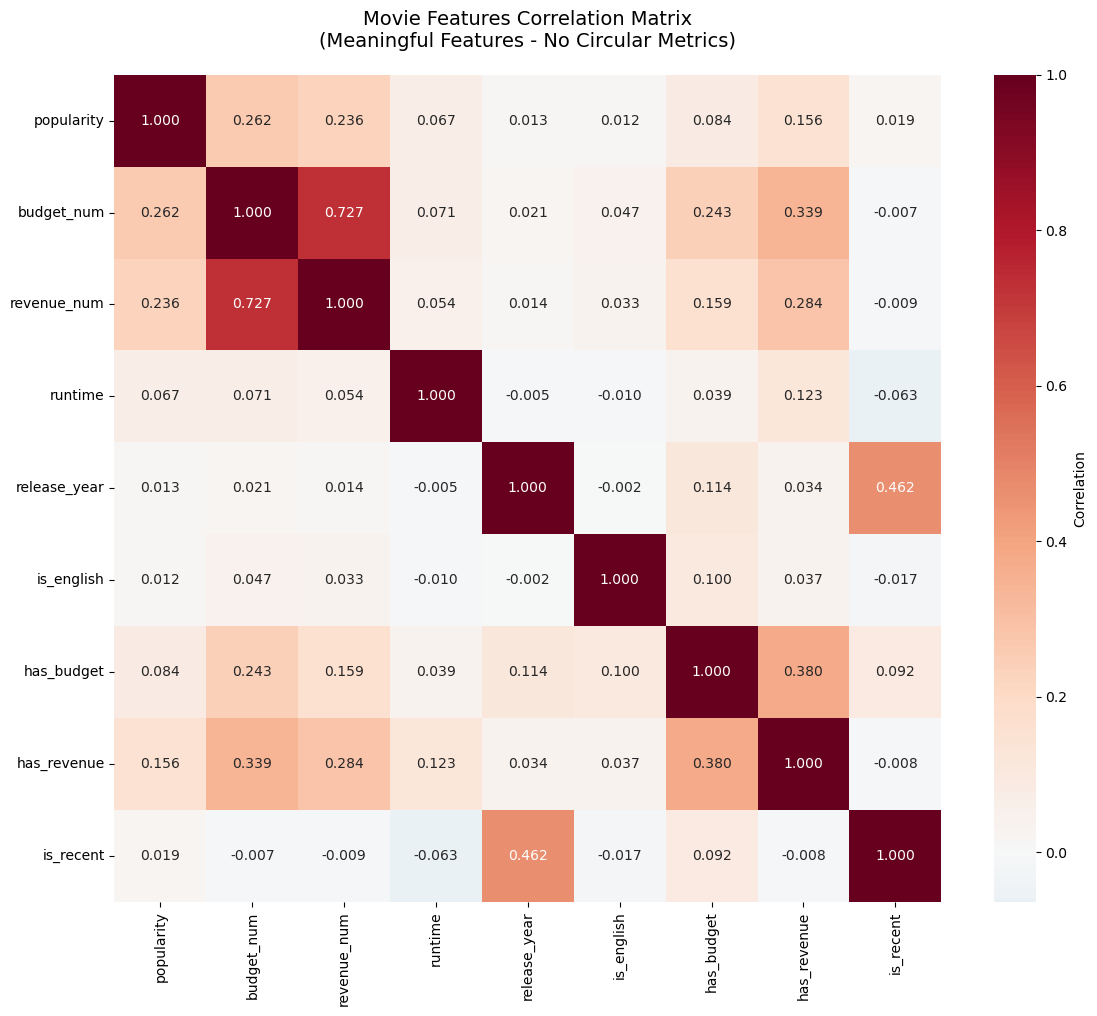

In [32]:
# Create meaningful correlation heatmap (excluding circular metrics)
meaningful_features = ['popularity', 'budget_num', 'revenue_num', 'runtime', 'release_year']
df_clean = df[meaningful_features].copy()

# Add binary features
df_clean['is_english'] = (df['original_language'] == 'en').astype(int)
df_clean['has_budget'] = (df['budget_num'] > 0).astype(int)
df_clean['has_revenue'] = (df['revenue_num'] > 0).astype(int)
df_clean['is_recent'] = (df['release_year'] >= 2020).astype(int)

plt.figure(figsize=(12, 10))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Movie Features Correlation Matrix\n(Meaningful Features - No Circular Metrics)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()